# TOPIC: IPL DATA ANALYSIS 

NAME: JEMI ROSE THOMAS

ORGANIZATION: ENTRI ELEVATE

DATE: 29.05.2024

Data Description:
   - Source: https://www.kaggle.com/datasets/nowke9/ipldata

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

import chart_studio.plotly as py
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()
import plotly.graph_objs as go

In [5]:
# Loading the dataset
matches = pd.read_csv('matches.csv')
deliveries = pd.read_csv('deliveries.csv')

In [6]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [7]:
matches.shape

(756, 18)

In [8]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [9]:
matches['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [10]:
teams = {'Sunrisers Hyderabad':'SRH', 'Mumbai Indians':'MI', 'Gujarat Lions':'GL',
       'Rising Pune Supergiant':'RPS', 'Royal Challengers Bangalore':'RCB',
       'Kolkata Knight Riders':'KKR', 'Delhi Daredevils':'DC', 'Kings XI Punjab':'KXIP',
       'Chennai Super Kings':'CSK', 'Rajasthan Royals':'RR', 'Deccan Chargers':'SRH',
       'Kochi Tuskers Kerala':'KTK', 'Pune Warriors':'PW', 'Rising Pune Supergiants':'RPS',
       'Delhi Capitals':'DC'}

In [11]:
# Mapping the abbreviated team names
matches['team1'] = matches['team1'].map(teams)
matches['team2'] = matches['team2'].map(teams)
matches['toss_winner'] = matches['toss_winner'].map(teams)
matches['winner'] = matches['winner'].map(teams)
matches.head ()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,SRH,RCB,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,MI,RPS,RPS,field,normal,0,RPS,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,GL,KKR,KKR,field,normal,0,KKR,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,RPS,KXIP,KXIP,field,normal,0,KXIP,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,RCB,DC,RCB,bat,normal,0,RCB,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [12]:
deliveries['batting_team'] = deliveries['batting_team'].map(teams)
deliveries['bowling_team'] = deliveries['bowling_team'].map(teams)
deliveries.head ()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,SRH,RCB,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,SRH,RCB,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,SRH,RCB,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,SRH,RCB,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,SRH,RCB,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


## Basic Analysis of IPL Matches

### 1. Outcome of the match

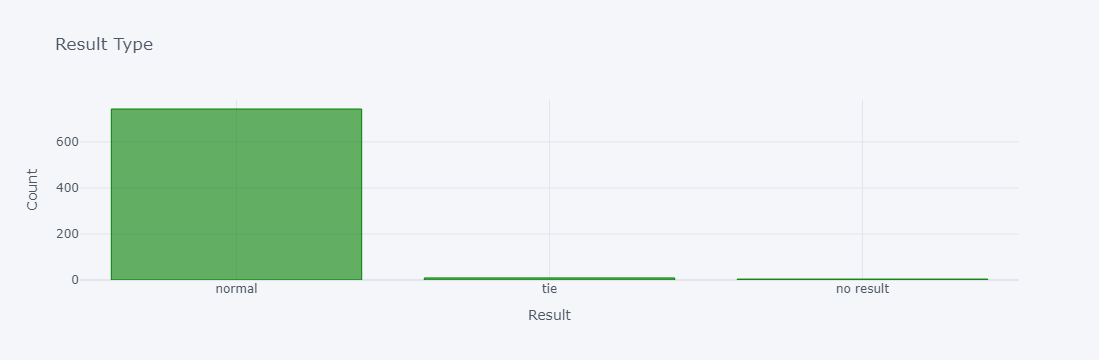

In [13]:
# Kind of result
matches['result'].value_counts().iplot(kind='bar',xTitle='Result', yTitle='Count', title = 'Result Type', color = 'green');

### 2. Win & Loss Analysis

In [14]:
winloss = matches[['team1','team2','winner']]
winloss.head()

,team1,team2,winner
0,SRH,RCB,SRH
1,MI,RPS,RPS
2,GL,KKR,KKR
3,RPS,KXIP,KXIP
4,RCB,DC,RCB


In [15]:
winloss['loser'] = winloss.apply(lambda x: x['team2'] if x['team1']== x['winner'] else x['team1'], axis = 1)
winloss.head()

,team1,team2,winner,loser
0,SRH,RCB,SRH,RCB
1,MI,RPS,RPS,MI
2,GL,KKR,KKR,GL
3,RPS,KXIP,KXIP,RPS
4,RCB,DC,RCB,DC


##### Number of wins per team

In [16]:
teamwins = winloss['winner'].value_counts()
teamwins

winner
MI      109
CSK     100
KKR      92
SRH      87
RCB      84
KXIP     82
DC       77
RR       75
RPS      15
GL       13
PW       12
KTK       6
Name: count, dtype: int64

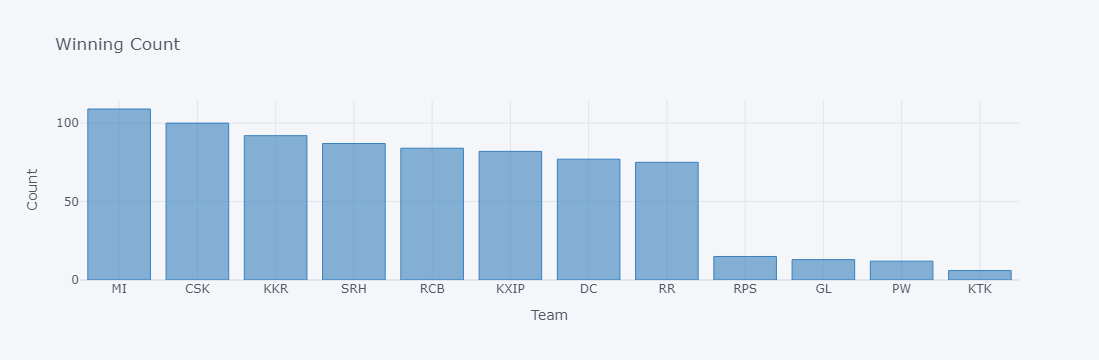

In [17]:
teamwins.iplot(kind='bar', xTitle = 'Team', yTitle = 'Count', title = 'Winning Count', color = 'blue');

##### Number of losses per team

In [18]:
teamloss = winloss['loser'].value_counts()
teamloss

loser
DC      100
SRH      96
RCB      95
KXIP     94
KKR      86
MI       78
RR       70
CSK      64
PW       33
GL       17
RPS      15
KTK       8
Name: count, dtype: int64

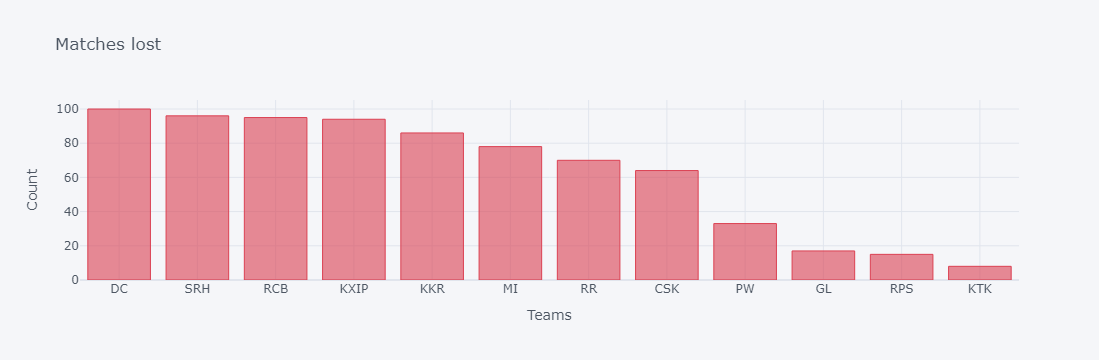

In [19]:
teamloss.iplot(kind='bar', xTitle='Teams',yTitle='Count',title = 'Matches lost', color = 'red');

### 3. %Win and %Loss

In [25]:
played = (matches['team1'].value_counts() + matches['team2'].value_counts()).reset_index()
played.columns = ['team','played']
played

,team,played
0,CSK,164
1,DC,177
2,GL,30
3,KKR,178
4,KTK,14
5,KXIP,176
6,MI,187
7,PW,46
8,RCB,180
9,RPS,30


In [26]:
wins = matches['winner'].value_counts().reset_index()
wins.columns = ['team','won']
wins

,team,won
0,MI,109
1,CSK,100
2,KKR,92
3,SRH,87
4,RCB,84
5,KXIP,82
6,DC,77
7,RR,75
8,RPS,15
9,GL,13


In [28]:
played = played.merge(wins, left_on='team', right_on='team', how='inner')
played

,team,played,won_x,won_y
0,CSK,164,100,100
1,DC,177,77,77
2,GL,30,13,13
3,KKR,178,92,92
4,KTK,14,6,6
5,KXIP,176,82,82
6,MI,187,109,109
7,PW,46,12,12
8,RCB,180,84,84
9,RPS,30,15,15


In [29]:
loss = winloss['loser'].value_counts().reset_index()
loss.columns = ['team','lost']
loss

,team,lost
0,DC,100
1,SRH,96
2,RCB,95
3,KXIP,94
4,KKR,86
5,MI,78
6,RR,70
7,CSK,64
8,PW,33
9,GL,17


In [31]:
played = played.merge(loss, left_on = 'team', right_on = 'team', how='inner')
played

,team,played,won_x,won_y,lost_x,lost_y
0,CSK,164,100,100,64,64
1,DC,177,77,77,100,100
2,GL,30,13,13,17,17
3,KKR,178,92,92,86,86
4,KTK,14,6,6,8,8
5,KXIP,176,82,82,94,94
6,MI,187,109,109,78,78
7,PW,46,12,12,33,33
8,RCB,180,84,84,95,95
9,RPS,30,15,15,15,15


In [28]:
trace1 = go.Bar(x=played['team'], y=played['played'], name='Matches Played')
trace2 = go.Bar(x=played['team'], y=played['won'], name='Matches Won')
data = [trace1, trace2]
iplot(data)

##### %win of each team

In [33]:
played['%win'].iplot(kind='bar', xTitle='Teams',yTitle='Win %', title='Win Percentage of Each Team', color = 'Yellow');

KeyError: '%win'

From the above analysis we can see that CSK has the highest win percentage (60.98%) and Pune Warriors has the lowest win percentage (26.09%)

### 4. City Wise Analysis

In [34]:
# Which city hosted the most number of matches
city = matches['city'].value_counts()
city

city
Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Centurion          12
Ahmedabad          12
Rajkot             10
Mohali             10
Indore              9
Dharamsala          9
Johannesburg        8
Cuttack             7
Ranchi              7
Port Elizabeth      7
Cape Town           7
Abu Dhabi           7
Sharjah             6
Raipur              6
Kochi               5
Kanpur              4
Nagpur              3
Kimberley           3
East London         3
Bloemfontein        2
Name: count, dtype: int64

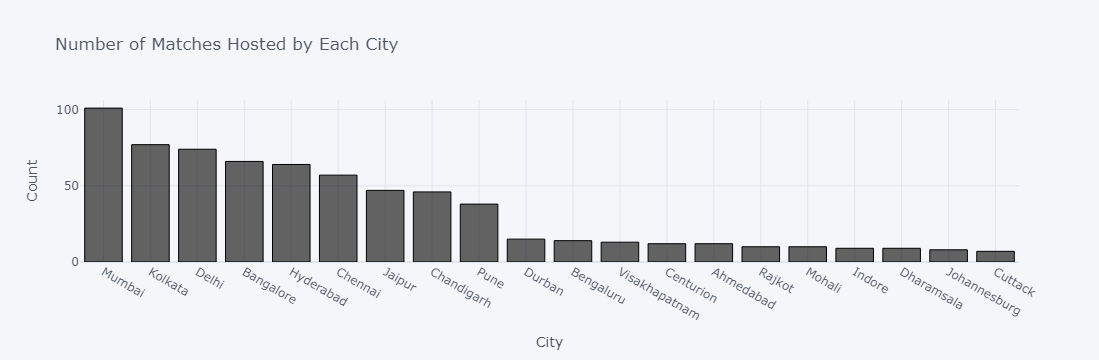

In [39]:
# Top 20 city which hosted the most number of matches
city[:20].iplot(kind='bar', xTitle='City',yTitle='Count', title='Number of Matches Hosted by Each City', color = 'black');

### 5. Stadium Wise Analysis

In [42]:
venues = matches['venue'].value_counts()
venues

venue
Eden Gardens                                            77
M Chinnaswamy Stadium                                   73
Wankhede Stadium                                        73
Feroz Shah Kotla                                        67
Rajiv Gandhi International Stadium, Uppal               56
MA Chidambaram Stadium, Chepauk                         49
Sawai Mansingh Stadium                                  47
Punjab Cricket Association Stadium, Mohali              35
Maharashtra Cricket Association Stadium                 21
Subrata Roy Sahara Stadium                              17
Dr DY Patil Sports Academy                              17
Kingsmead                                               15
Punjab Cricket Association IS Bindra Stadium, Mohali    14
SuperSport Park                                         12
Sardar Patel Stadium, Motera                            12
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     11
Brabourne Stadium                                 

GRAPHICAL REPRESENTATION:

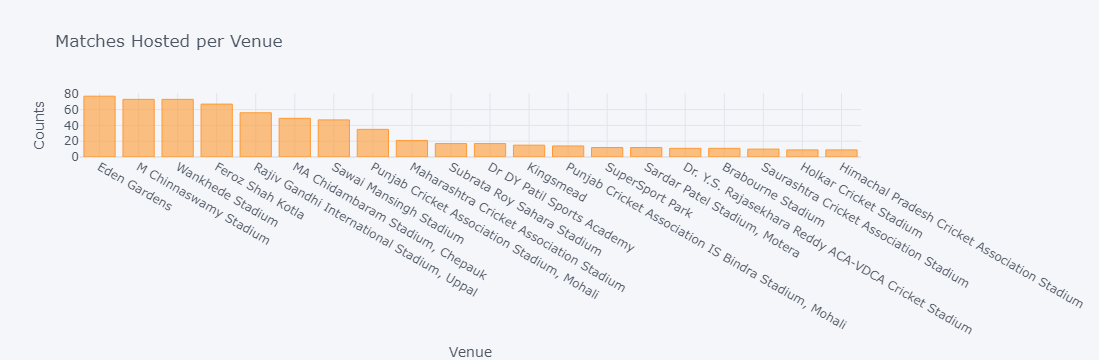

In [48]:
# Top 20 stadiums which has hosted the most number of matches
venues[0:20].iplot(kind='bar', xTitle='Venue', yTitle='Counts',title='Matches Hosted per Venue')

### 6. Analyzing Toss

##### Teams with maximum number of toss wins

In [49]:
tosswins = matches['toss_winner'].value_counts()
tosswins

toss_winner
MI      98
KKR     92
DC      90
SRH     89
CSK     89
RCB     81
KXIP    81
RR      80
PW      20
GL      15
RPS     13
KTK      8
Name: count, dtype: int64

GRAPHICAL REPRESENTATION:

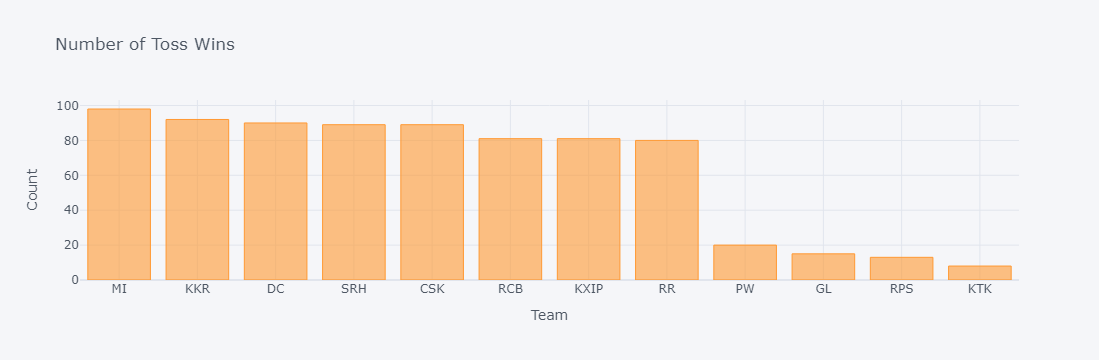

In [47]:
tosswins.iplot(kind='bar',xTitle='Team',yTitle='Count',title='Number of Toss Wins');

##### Prefered Toss decision per season

In [51]:
tossdec = matches.groupby('season')['toss_decision'].value_counts()
tossdec = pd.DataFrame(tossdec)
tossdec.columns = ['Count']
tossdec.reset_index(inplace=True)
tossdec.set_index('season',inplace=True)
tossdec

,toss_decision,Count
season,,
2008,field,32
2008,bat,26
2009,bat,35
2009,field,22
2010,bat,39
2010,field,21
2011,field,48
2011,bat,25
2012,bat,37


GRAPHICAL REPRESENTATION:

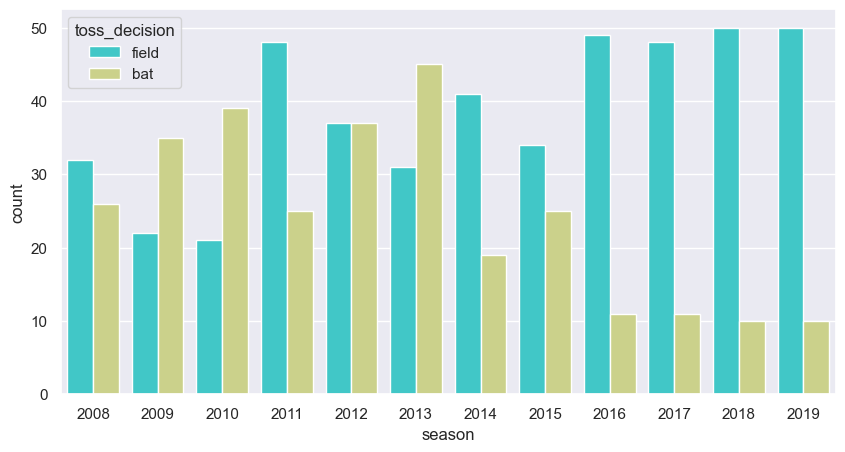

In [54]:
plt.figure(figsize=(10,5))
sns.countplot(x='season',hue='toss_decision',data=matches, palette='rainbow');

### 7. Match summary

##### Number of matches played per season

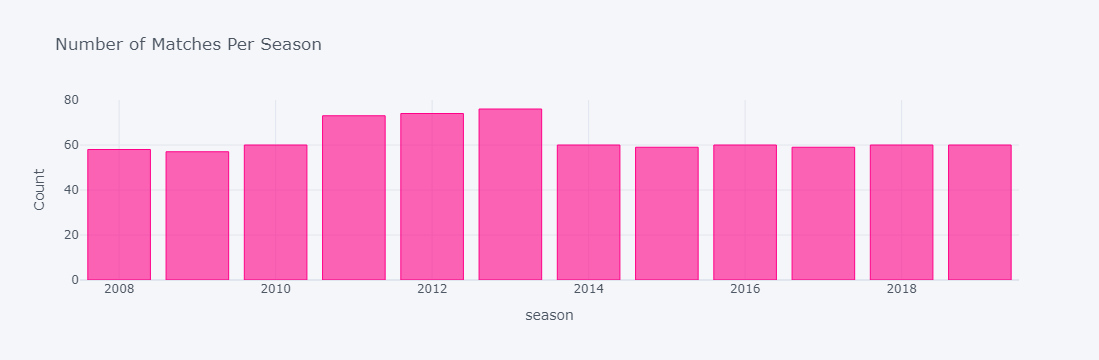

In [55]:
matches['season'].value_counts().iplot (kind='bar', xTitle='season', yTitle='Count', title='Number of Matches Per Season', color = 'pink')

##### Runs across the season

In [57]:
df = matches[['id','season']].merge(deliveries, left_on='id', right_on='match_id',how='left')
df.drop('id',axis=1,inplace=True)
df.head(2)

,season,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,2017,1,1,SRH,RCB,1,1,DA Warner,S Dhawan,TS Mills,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,2017,1,1,SRH,RCB,1,2,DA Warner,S Dhawan,TS Mills,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [58]:
seasonruns = df.groupby('season')['total_runs'].sum().reset_index()
seasonruns.set_index('season',inplace=True)

seasonruns

,total_runs
season,
2008,17937
2009,16353
2010,18883
2011,21154
2012,22453
2013,22602
2014,18931
2015,18353
2016,18862


GRAPHICAL REPRESENTATION:

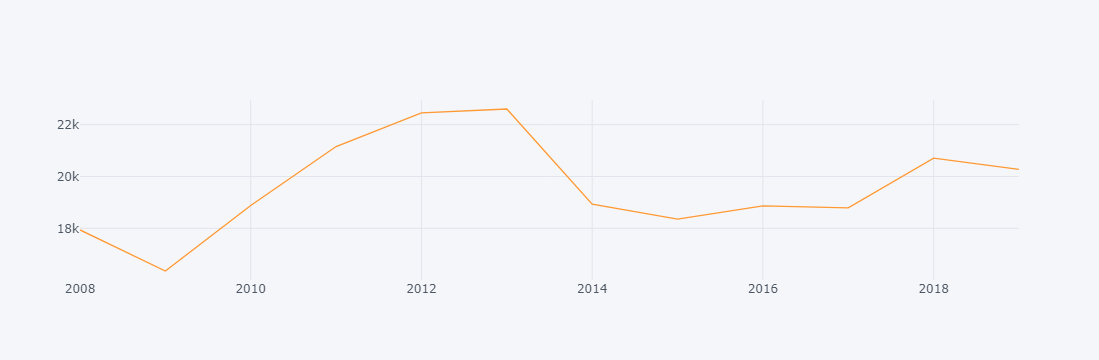

In [60]:
seasonruns.iplot()

In [61]:
seasonruns = seasonruns.reset_index()
no_of_matches = list(matches.groupby('season')['id'].count())
seasonruns['matches'] = no_of_matches
seasonruns

,season,total_runs,matches
0,2008,17937,58
1,2009,16353,57
2,2010,18883,60
3,2011,21154,73
4,2012,22453,74
5,2013,22602,76
6,2014,18931,60
7,2015,18353,59
8,2016,18862,60
9,2017,18786,59


In [62]:
seasonruns['runs_per_match'] = round(seasonruns['total_runs'] / seasonruns['matches'])
seasonruns

,season,total_runs,matches,runs_per_match
0,2008,17937,58,309.0
1,2009,16353,57,287.0
2,2010,18883,60,315.0
3,2011,21154,73,290.0
4,2012,22453,74,303.0
5,2013,22602,76,297.0
6,2014,18931,60,316.0
7,2015,18353,59,311.0
8,2016,18862,60,314.0
9,2017,18786,59,318.0


GRAPHICAL REPRESENTATION:

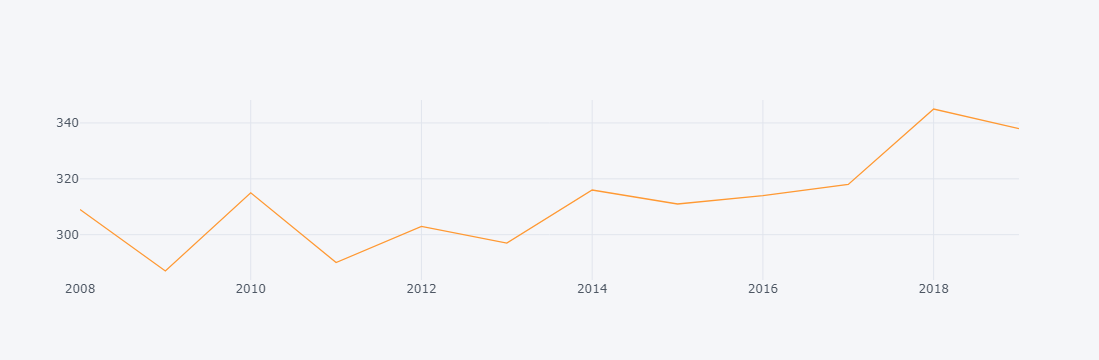

In [63]:
seasonruns.set_index('season',inplace=True)
seasonruns['runs_per_match'].iplot()

##### Win by highest margin

In [64]:
matches[matches['win_by_runs'] == matches['win_by_runs'].max()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
43,44,2017,Delhi,2017-05-06,MI,DC,DC,field,normal,0,MI,146,0,LMP Simmons,Feroz Shah Kotla,Nitin Menon,CK Nandan,NaN


In [67]:
matches[matches['win_by_wickets'] == matches['win_by_wickets'].max()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
2,3,2017,Rajkot,2017-04-07,GL,KKR,KKR,field,normal,0,KKR,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
34,35,2017,Chandigarh,2017-04-30,DC,KXIP,KXIP,field,normal,0,KXIP,0,10,Sandeep Sharma,"Punjab Cricket Association IS Bindra Stadium, ...",YC Barde,CK Nandan,NaN
71,72,2008,Mumbai,2008-04-27,MI,SRH,SRH,field,normal,0,SRH,0,10,AC Gilchrist,Dr DY Patil Sports Academy,Asad Rauf,SL Shastri,NaN
119,120,2009,Cape Town,2009-04-19,KXIP,DC,DC,field,normal,1,DC,0,10,DL Vettori,Newlands,MR Benson,SD Ranade,NaN
183,184,2010,Bangalore,2010-03-18,RR,RCB,RCB,field,normal,0,RCB,0,10,JH Kallis,M Chinnaswamy Stadium,K Hariharan,DJ Harper,NaN
298,299,2011,Mumbai,2011-05-20,MI,RR,MI,bat,normal,0,RR,0,10,SR Watson,Wankhede Stadium,RE Koertzen,PR Reiffel,NaN
376,377,2012,Jaipur,2012-05-20,RR,MI,RR,bat,normal,0,MI,0,10,DR Smith,Sawai Mansingh Stadium,HDPK Dharmasena,C Shamshuddin,NaN
390,391,2013,Chandigarh,2013-04-10,KXIP,CSK,CSK,field,normal,0,CSK,0,10,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Aleem Dar,C Shamshuddin,NaN
542,543,2015,Delhi,2015-04-26,DC,RCB,RCB,field,normal,0,RCB,0,10,VR Aaron,Feroz Shah Kotla,M Erasmus,S Ravi,NaN
590,591,2016,Rajkot,2016-04-21,GL,SRH,SRH,field,normal,0,SRH,0,10,B Kumar,Saurashtra Cricket Association Stadium,K Bharatan,HDPK Dharmasena,NaN


##### Win by highest margin per season

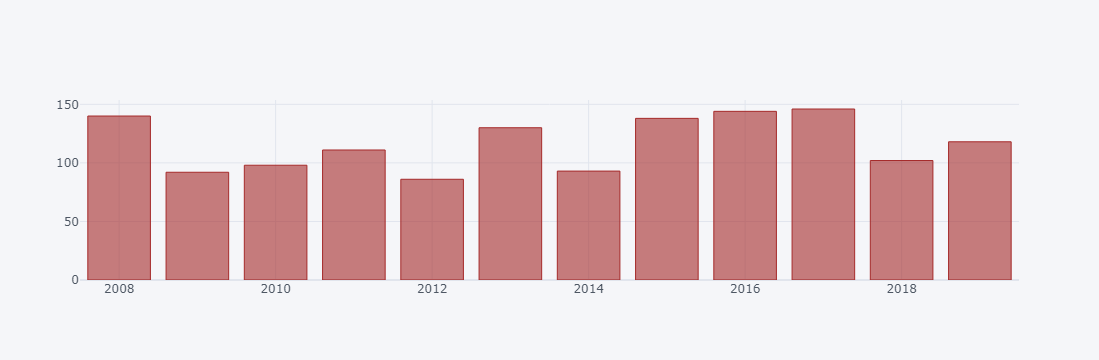

In [68]:
matches.groupby('season')[['win_by_runs']].max().iplot(kind='bar', color = 'brown');

### 8. Score Distribution of Each Team by Innings

In [70]:
runs = deliveries.groupby(['match_id','inning','batting_team'])['total_runs'].sum().reset_index()
runs

,match_id,inning,batting_team,total_runs
0,1,1,SRH,207
1,1,2,RCB,172
2,2,1,MI,184
3,2,2,RPS,187
4,3,1,GL,183
...,...,...,...,...
1523,11413,2,DC,170
1524,11414,1,DC,155
1525,11414,2,CSK,162
1526,11415,1,MI,152


##### For First Inning

In [75]:
innings1 = runs[runs['inning']==1]
innings1.drop('inning',axis=1,inplace=True)
innings1

,batting_team,total_runs
0,SRH,207
2,MI,184
4,GL,183
6,RPS,163
8,RCB,157
...,...,...
1518,KKR,143
1520,CSK,136
1522,SRH,171
1524,DC,155


GRAPHICAL REPRESENTATION:

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16264\1024726483.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




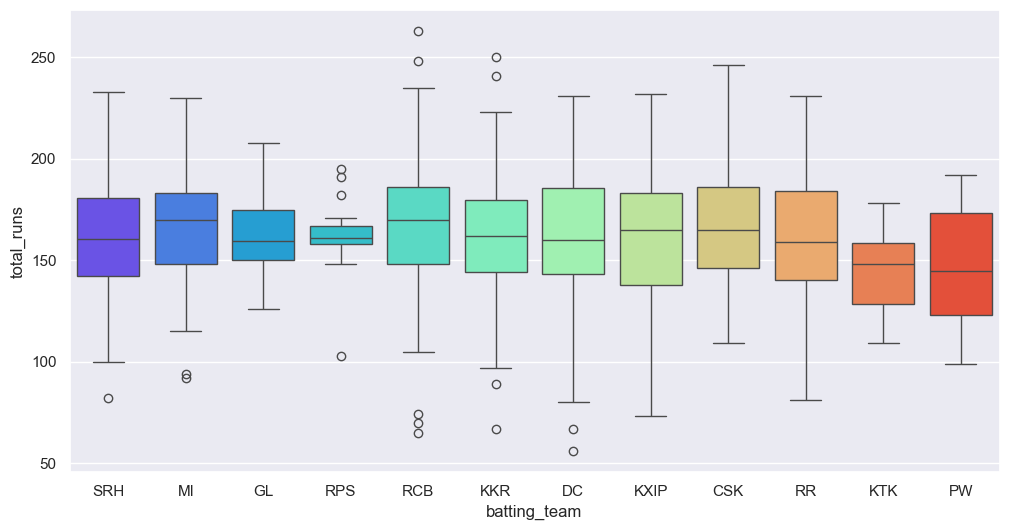

In [76]:
plt.figure(figsize=(12,6))
sns.boxplot(x='batting_team',y='total_runs',data=innings1, palette='rainbow');

##### For 2nd Inning

In [77]:
innings2 = runs[runs['inning']==2]
innings2.drop('inning',axis=1,inplace=True)
innings2

,batting_team,total_runs
1,RCB,172
3,RPS,187
5,KKR,184
7,KXIP,164
9,DC,142
...,...,...
1519,MI,137
1521,MI,140
1523,DC,170
1525,CSK,162


GRAPHICAL REPRESENTATION:

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16264\3596098179.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='batting_team', ylabel='total_runs'>

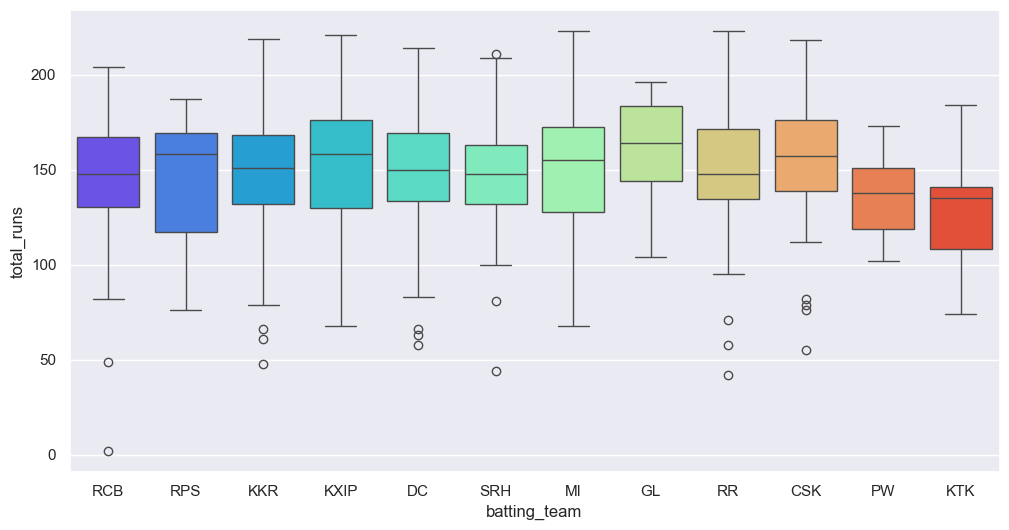

In [79]:
plt.figure(figsize=(12,6))
sns.boxplot(data=innings2, x='batting_team', y='total_runs', palette='rainbow')

##### Number of times scored or conceded above 200 runs by each team

In [81]:
scores = deliveries.groupby(['match_id','inning','batting_team','bowling_team'])['total_runs'].sum().reset_index()
scores

,match_id,inning,batting_team,bowling_team,total_runs
0,1,1,SRH,RCB,207
1,1,2,RCB,SRH,172
2,2,1,MI,RPS,184
3,2,2,RPS,MI,187
4,3,1,GL,KKR,183
...,...,...,...,...,...
1523,11413,2,DC,SRH,170
1524,11414,1,DC,CSK,155
1525,11414,2,CSK,DC,162
1526,11415,1,MI,CSK,152


In [82]:
scored_200 = scores[scores['total_runs'] >= 200]
scored_200

,match_id,inning,batting_team,bowling_team,total_runs
0,1,1,SRH,RCB,207
16,9,1,DC,RPS,205
38,20,1,RCB,GL,213
62,32,1,SRH,KXIP,207
72,36,1,SRH,KKR,209
...,...,...,...,...,...
1475,11326,2,KKR,RCB,219
1488,11333,1,RCB,KXIP,213
1498,11338,1,KKR,MI,241
1499,11338,2,MI,KKR,204


Scored more than 200 runs

In [60]:
scored_200['batting_team'].value_counts()

RCB     19
CSK     17
KXIP    15
MI      14
KKR     12
SRH     11
RR       8
DC       8
GL       1
Name: batting_team, dtype: int64

GRAPHICAL REPRESENTATION:

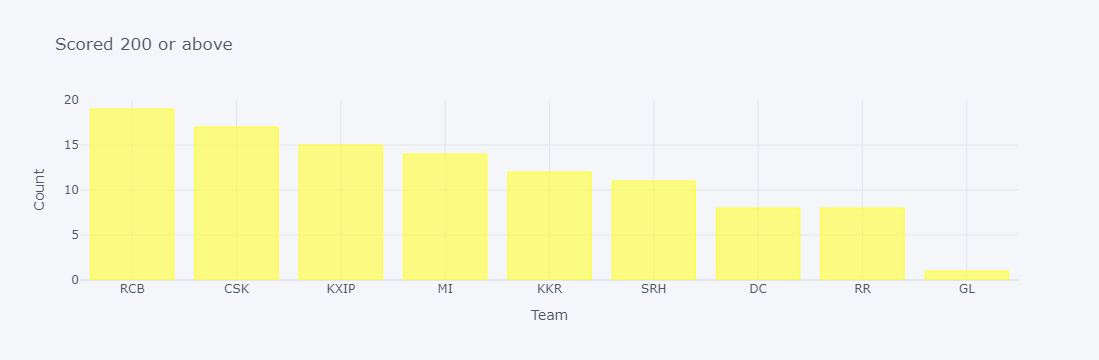

In [83]:
scored_200['batting_team'].value_counts().iplot(kind='bar', xTitle='Team',yTitle='Count',title='Scored 200 or above', 
color = 'yellow');

In [84]:
# Conceded 200 or avove
scored_200['bowling_team'].value_counts()

bowling_team
KXIP    21
RCB     15
DC      12
CSK     12
RR      12
KKR     10
SRH     10
MI       8
GL       3
RPS      1
PW       1
Name: count, dtype: int64

GRAPHICAL REPRESENTATION:

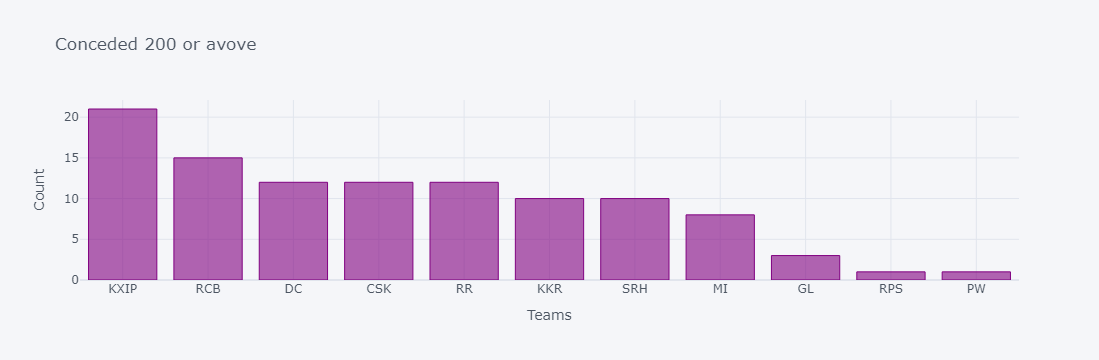

In [85]:
scored_200['bowling_team'].value_counts().iplot(kind='bar', xTitle='Teams',yTitle='Count', title='Conceded 200 or avove', color = 'purple');

### 9. Comparing two teams

<Axes: xlabel='season', ylabel='count'>

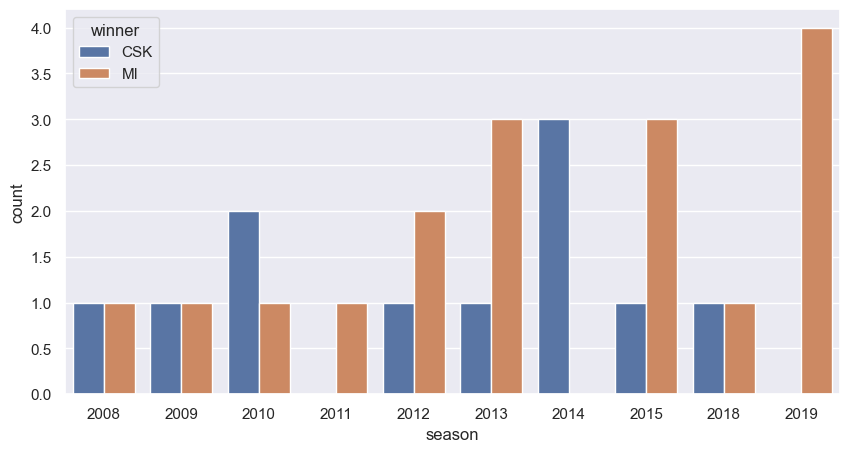

In [88]:
def comparison(team1,team2):
    compare = matches[((matches['team1']==team1) | (matches['team2']==team1)) & ((matches['team1']==team2) | (matches['team2']==team2))]
    return sns.countplot (x ='season',hue ='winner',data =compare)

plt.figure(figsize=(10,5))
comparison('MI','CSK')

### 10. Wins at different venues

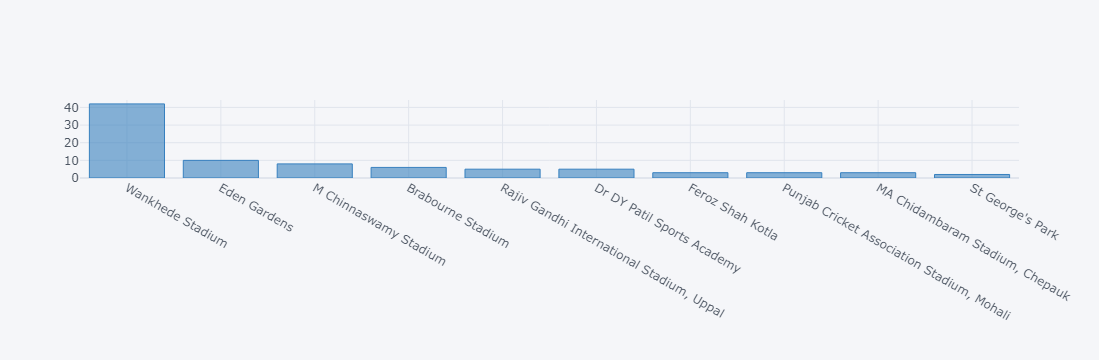

In [90]:
def lucky(matches,team):
    return matches[matches['winner']==team]['venue'].value_counts()
    
lucky(matches,'MI')[:10].iplot(kind='bar', color = 'blue')

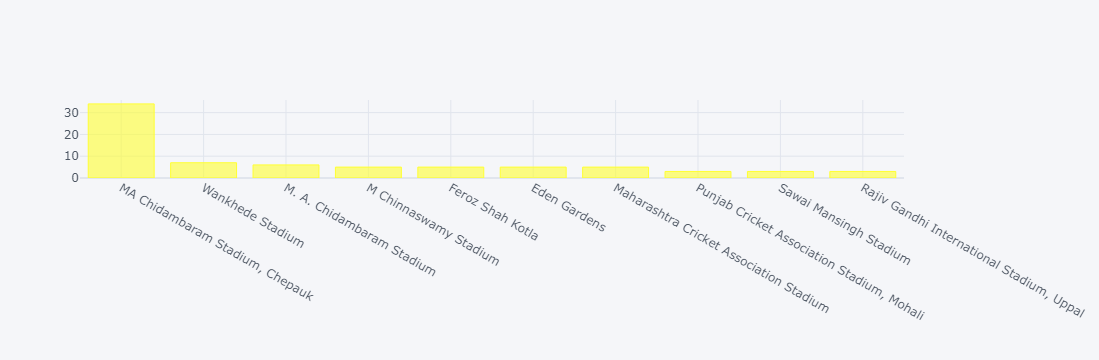

In [91]:
lucky(matches,'CSK')[0:10].iplot(kind='bar', color = 'Yellow')

### 11. Head-to-Head Comparison of Two Teams

In [92]:
def geth2h(team1,team2):
    teams = ['MI','CSK']
    if team1 in teams and team2 in teams:
        return True
    else:
        return False

index=[]
for row in matches.iterrows():
    flag = geth2h(row[1]['team1'],row[1]['team2'])
    index.append(flag)

sum (index)

28

In [94]:
h2h = matches[index]
h2h

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
66,67,2008,Chennai,2008-04-23,CSK,MI,MI,field,normal,0,CSK,6,0,ML Hayden,"MA Chidambaram Stadium, Chepauk",DJ Harper,GA Pratapkumar,NaN
95,96,2008,Mumbai,2008-05-14,CSK,MI,MI,field,normal,0,MI,0,9,ST Jayasuriya,Wankhede Stadium,BR Doctrove,AM Saheba,NaN
117,118,2009,Cape Town,2009-04-18,MI,CSK,CSK,field,normal,0,MI,19,0,SR Tendulkar,Newlands,BR Doctrove,K Hariharan,NaN
161,162,2009,Port Elizabeth,2009-05-16,MI,CSK,MI,bat,normal,0,CSK,0,7,ML Hayden,St George's Park,SK Tarapore,SJA Taufel,NaN
193,194,2010,Mumbai,2010-03-25,CSK,MI,MI,field,normal,0,MI,0,5,SR Tendulkar,Brabourne Stadium,BF Bowden,AM Saheba,NaN
210,211,2010,Chennai,2010-04-06,CSK,MI,CSK,bat,normal,0,CSK,24,0,SK Raina,"MA Chidambaram Stadium, Chepauk",S Asnani,DJ Harper,NaN
233,234,2010,Mumbai,2010-04-25,CSK,MI,CSK,bat,normal,0,CSK,22,0,SK Raina,Dr DY Patil Sports Academy,RE Koertzen,SJA Taufel,NaN
256,257,2011,Mumbai,2011-04-22,MI,CSK,CSK,field,normal,0,MI,8,0,Harbhajan Singh,Wankhede Stadium,Asad Rauf,AM Saheba,NaN
307,308,2012,Chennai,2012-04-04,CSK,MI,MI,field,normal,0,MI,0,8,RE Levi,"MA Chidambaram Stadium, Chepauk",JD Cloete,SJA Taufel,NaN
354,355,2012,Mumbai,2012-05-06,CSK,MI,MI,field,normal,0,MI,0,2,DR Smith,Wankhede Stadium,Asad Rauf,S Asnani,NaN


GRAPHICAL REPRESENTATION:

In [74]:
h2h['winner'].value_counts().iplot(kind='bar');

##### MI vs CSK Head-to-Head Toss Victories

In [75]:
h2h['toss_winner'].value_counts().iplot(kind='bar');

##### MI vs CSK Toss Decision

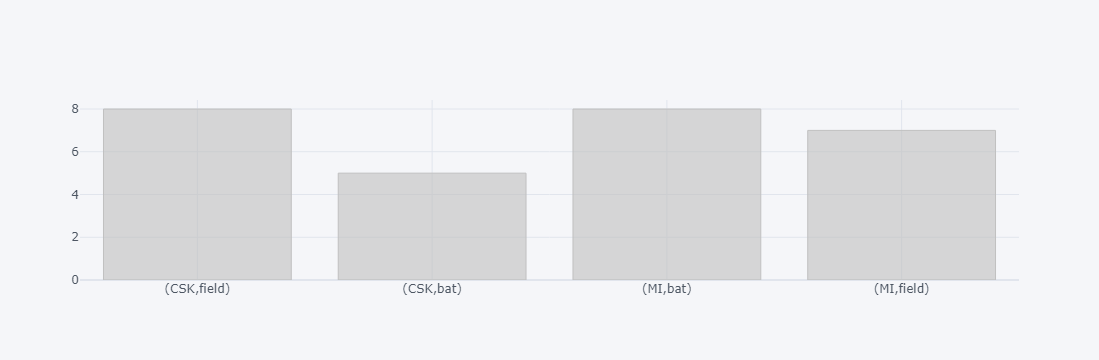

In [95]:
h2h.groupby('toss_winner')['toss_decision'].value_counts().iplot(kind='bar', color = 'silver');

##### MI vs CSK Most Player of the Match Awards

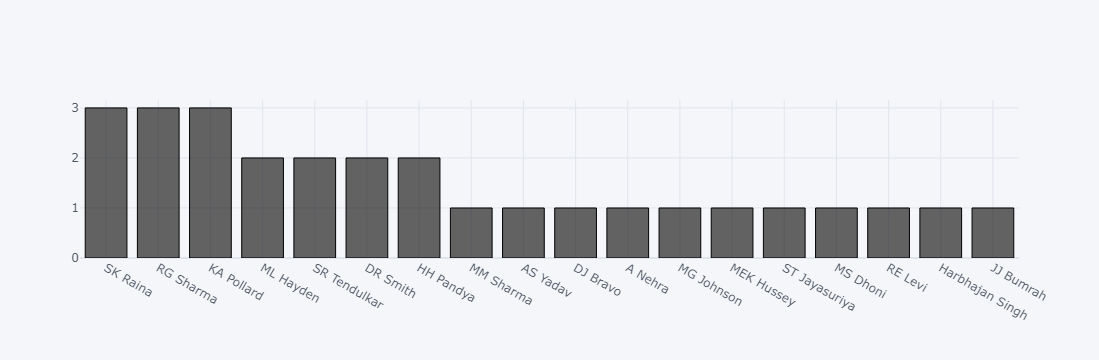

In [97]:
h2h['player_of_match'].value_counts().iplot(kind='bar', color = 'black');

In [100]:
winmargin = h2h[['winner','win_by_runs','win_by_wickets']]
winmargin.set_index('winner',inplace=True)
winmargin.head()

,win_by_runs,win_by_wickets
winner,,
CSK,6,0
MI,0,9
MI,19,0
CSK,0,7
MI,0,5


GRAPHICAL REPRESENTATION:

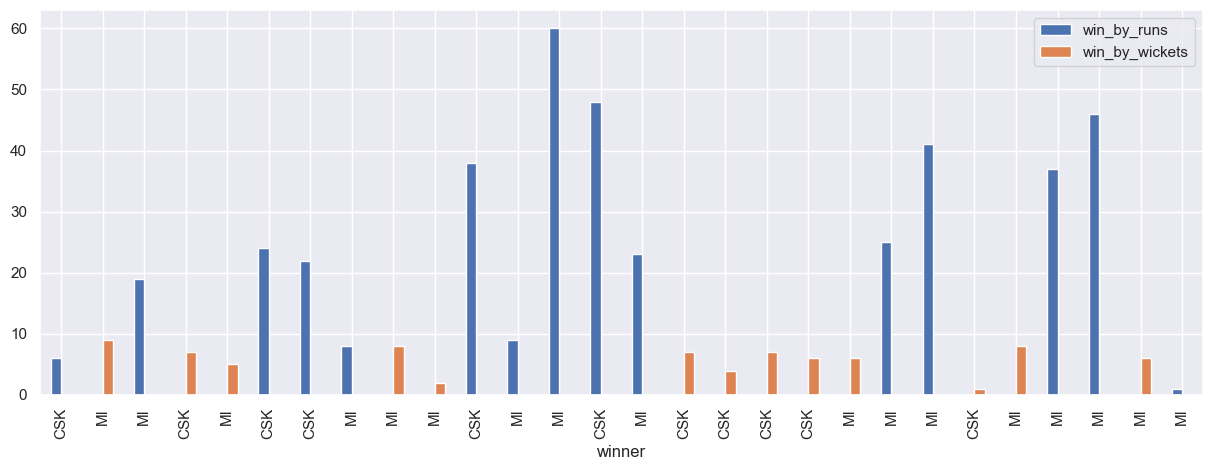

In [101]:
winmargin.plot.bar(figsize=(15,5));

### 12. Most Player of the Match Award Winner

In [104]:
matches['player_of_match'].value_counts()

player_of_match
CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
                  ..
PD Collingwood     1
NV Ojha            1
AC Voges           1
J Theron           1
S Hetmyer          1
Name: count, Length: 226, dtype: int64

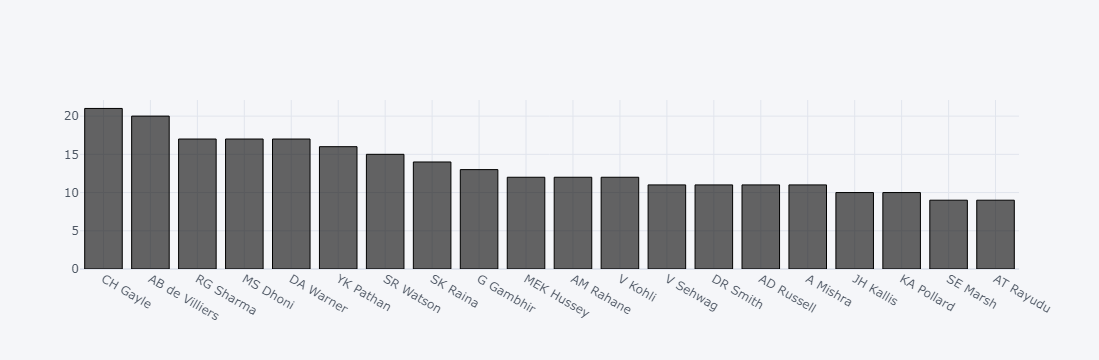

In [108]:
matches['player_of_match'].value_counts()[:20].iplot(kind='bar', color =  'black')

## PlayerStatistics

### 1. Faced Most Number of Balls

In [109]:
deliveries.head(1)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,SRH,RCB,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


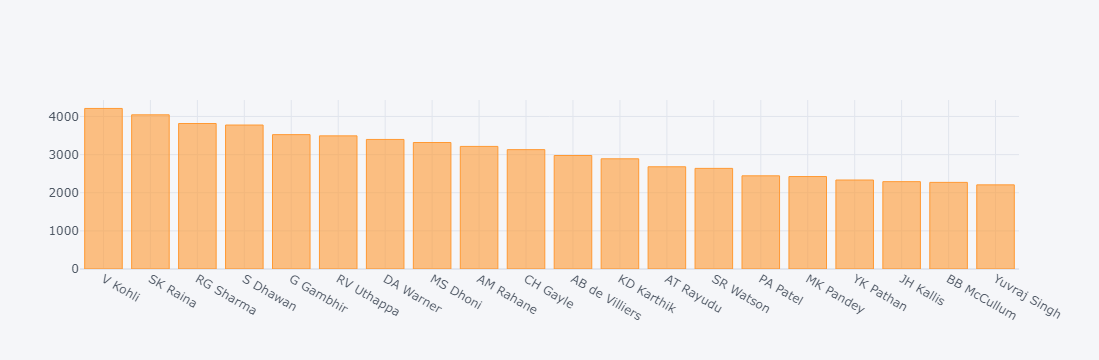

In [110]:
deliveries['batsman'].value_counts()[:20].iplot(kind='bar');

### 2. Players who have seen the most deliveries from the non-striker end

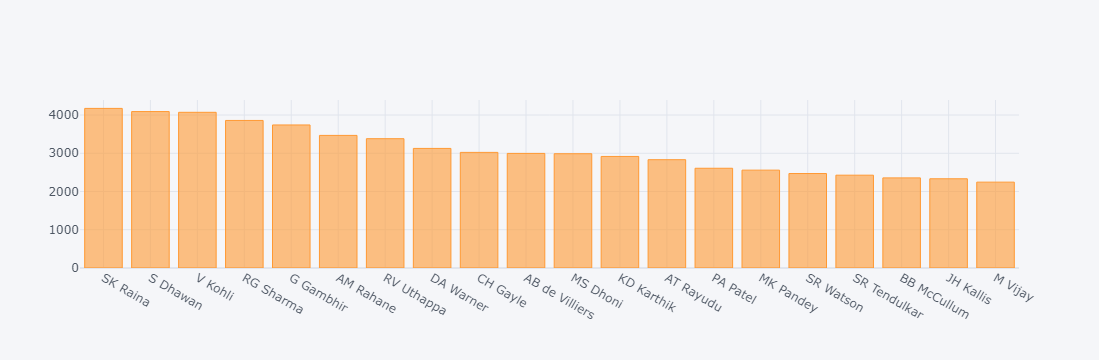

In [112]:
deliveries['non_striker'].value_counts()[0:20].iplot(kind='bar');

### 3. Highest Run Scorers

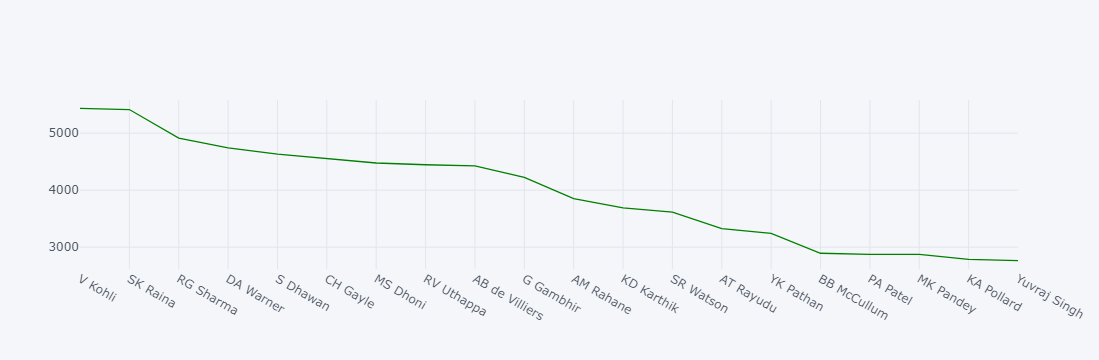

In [115]:
runscorer = deliveries.groupby('batsman')['batsman_runs'].sum()
runscorer = runscorer.sort_values(ascending=False)
runscorer[:20].iplot(kind='scatter', color = 'green');

### 4. Most Number of Half-Centuries and Centuries

In [122]:
permatchruns = deliveries.groupby(['match_id','batsman'])['batsman_runs'].sum().reset_index()
permatchruns.head()

,match_id,batsman,batsman_runs
0,1,A Choudhary,6
1,1,BCJ Cutting,16
2,1,CH Gayle,32
3,1,DA Warner,14
4,1,DJ Hooda,16


##### Most Number of Half-Centuries

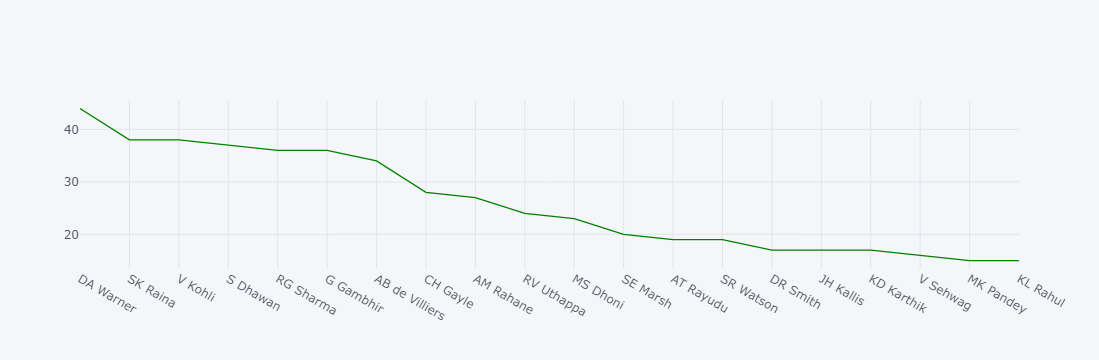

In [125]:
fifties = permatchruns[(permatchruns['batsman_runs'] >=50) & (permatchruns['batsman_runs'] < 100)]
halfcents = fifties['batsman'].value_counts()
halfcents[:20].iplot(kind='scatter', color = 'green');

##### Most Number of Centuries

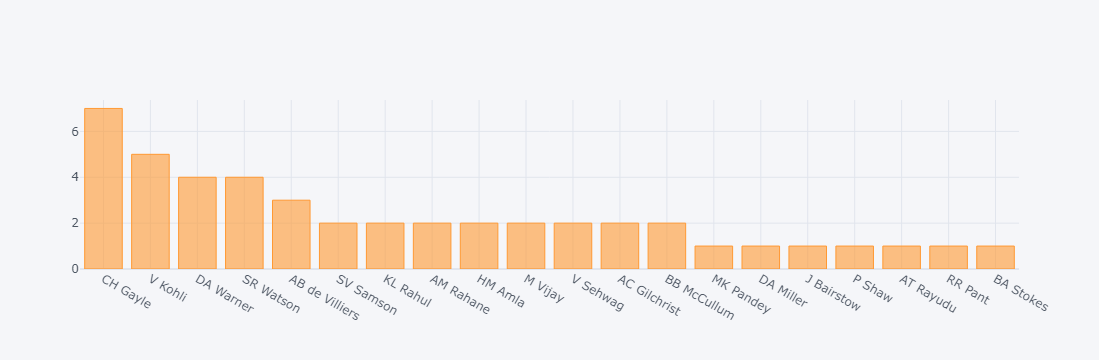

In [126]:
centuries = permatchruns[permatchruns['batsman_runs'] >=100]
cents = centuries['batsman'].value_counts()
cents[:20].iplot(kind='bar');

### 5. Most Number of Maximum (6s)

In [127]:
sixes = deliveries[deliveries['batsman_runs']==6]
sixes.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
10,1,1,SRH,RCB,2,4,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
47,1,1,SRH,RCB,8,4,MC Henriques,S Dhawan,TM Head,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
75,1,1,SRH,RCB,13,2,Yuvraj Singh,MC Henriques,A Choudhary,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
89,1,1,SRH,RCB,15,3,Yuvraj Singh,MC Henriques,S Aravind,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
91,1,1,SRH,RCB,15,5,MC Henriques,Yuvraj Singh,S Aravind,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN


In [128]:
six = sixes.groupby('batsman')['batsman_runs'].count().reset_index()
six.columns = ['batsman','6s']
six.sort_values(by='6s',ascending=False,inplace=True)
six.set_index('batsman',inplace=True)
six.head()

,6s
batsman,
CH Gayle,327
AB de Villiers,214
MS Dhoni,207
SK Raina,195
RG Sharma,194


GRAPHICAL REPRESENTATION:

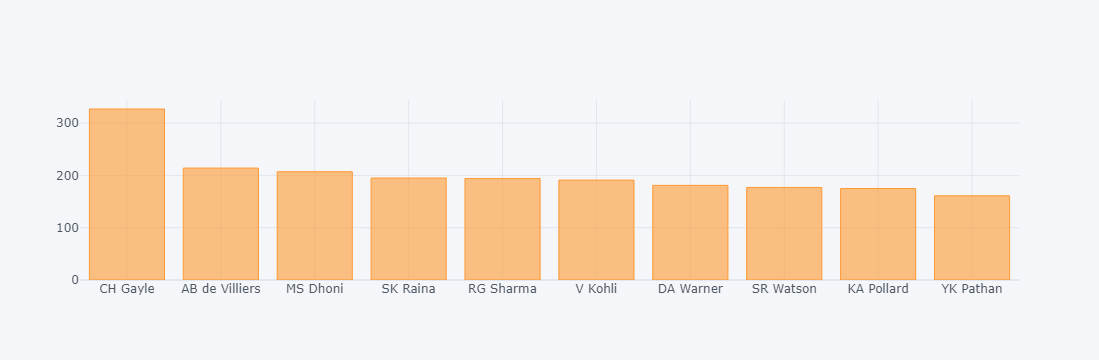

In [129]:
six[:10].iplot(kind='bar');

### 6. Most Number of Boundaries (4s)

In [130]:
fours = deliveries[deliveries['batsman_runs']==4]
fours.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
2,1,1,SRH,RCB,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
8,1,1,SRH,RCB,2,2,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
13,1,1,SRH,RCB,2,7,MC Henriques,S Dhawan,A Choudhary,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
30,1,1,SRH,RCB,5,5,MC Henriques,S Dhawan,S Aravind,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
32,1,1,SRH,RCB,6,1,S Dhawan,MC Henriques,SR Watson,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [131]:
four = fours.groupby('batsman')['batsman_runs'].count()
four = four.sort_values(ascending=False)
four

batsman
S Dhawan          526
SK Raina          495
G Gambhir         492
V Kohli           482
DA Warner         459
                 ... 
Sandeep Sharma      1
S Mavi              1
Shivam Sharma       1
NS Naik             1
J Theron            1
Name: batsman_runs, Length: 410, dtype: int64

GRAPHICAL REPRESENTATION:

In [104]:
four[:10].iplot(kind='bar');

### 7. Highest Scores of Each Batsman

In [132]:
highest = deliveries.groupby(['match_id','batting_team','batsman'])['batsman_runs'].sum().reset_index()
batsman_highest = highest.groupby('batsman')['batsman_runs'].max().sort_values(ascending=False)
batsman_highest.head()

batsman
CH Gayle          175
BB McCullum       158
AB de Villiers    133
RR Pant           130
M Vijay           127
Name: batsman_runs, dtype: int64

GRAPHICAL REPRESENTATION:

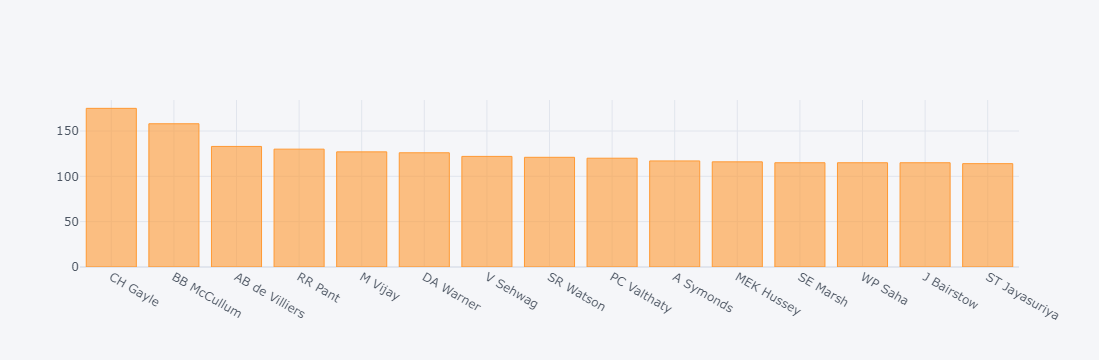

In [133]:
batsman_highest[:15].iplot(kind='bar');

### 8. Player who got dismissed most number of times

In [134]:
deliveries['player_dismissed'].value_counts()

player_dismissed
SK Raina      162
RG Sharma     155
RV Uthappa    153
V Kohli       143
S Dhawan      137
             ... 
S Randiv        1
R Ninan         1
B Sumanth       1
C Madan         1
S Singh         1
Name: count, Length: 487, dtype: int64

GRAPHICAL REPRESENTATION:

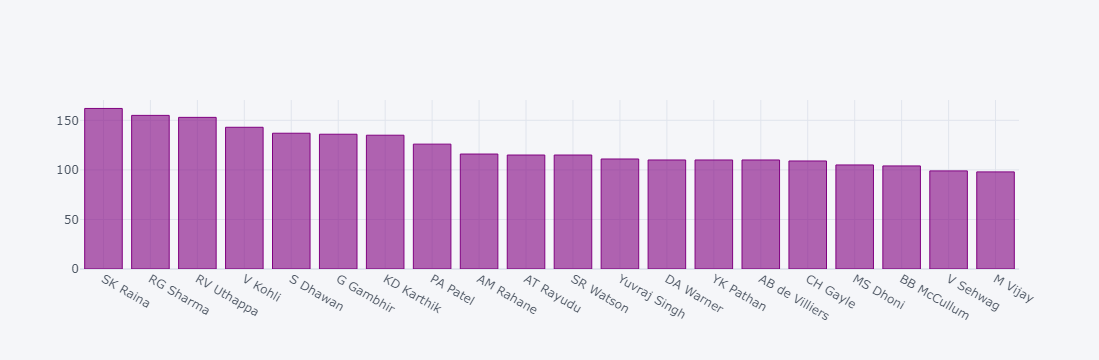

In [135]:
deliveries['player_dismissed'].value_counts()[:20].iplot(kind='bar', color = 'purple');

_______________________________________

## Bowling Analysis

_____________________________________________________

### 1. Dismissals

In [136]:
deliveries['dismissal_kind'].value_counts()

dismissal_kind
caught                   5348
bowled                   1581
run out                   852
lbw                       540
stumped                   278
caught and bowled         211
retired hurt               12
hit wicket                 10
obstructing the field       2
Name: count, dtype: int64

GRAPHICAL REPRESENTATION:

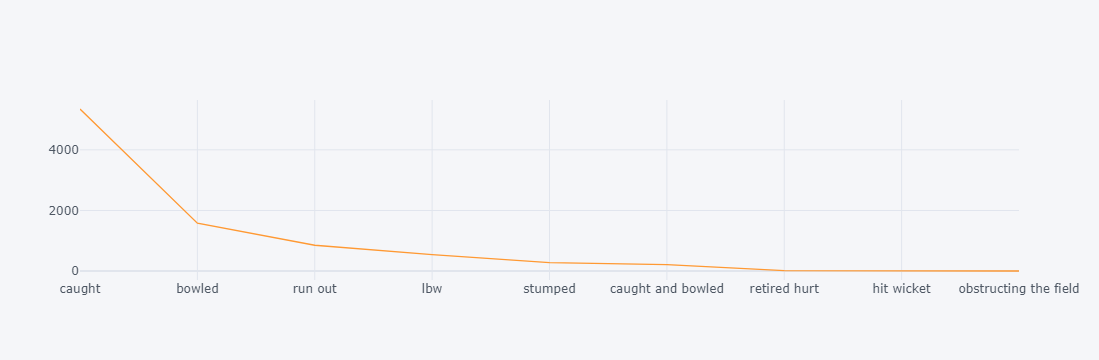

In [143]:
deliveries['dismissal_kind'].value_counts().iplot(kind='line');

### 2. Bowler with most number of wickets

In [145]:
deliveries['dismissal_kind'].unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'caught and bowled',
       'stumped', 'retired hurt', 'hit wicket', 'obstructing the field'],
      dtype=object)

In [148]:
kind = ['caught','bowled','lbw','caught and bowled','stumped','hit wicket']
out = deliveries[deliveries['dismissal_kind'].isin (kind)]
out.tail()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
178977,11415,2,CSK,MI,4,6,F du Plessis,SR Watson,KH Pandya,0,...,0,0,0,0,0,0,0,F du Plessis,stumped,Q de Kock
179012,11415,2,CSK,MI,10,2,SK Raina,SR Watson,RD Chahar,0,...,0,0,0,0,0,0,0,SK Raina,lbw,NaN
179019,11415,2,CSK,MI,11,3,AT Rayudu,SR Watson,JJ Bumrah,0,...,0,0,0,0,0,0,0,AT Rayudu,caught,Q de Kock
179067,11415,2,CSK,MI,19,2,DJ Bravo,SR Watson,JJ Bumrah,0,...,0,0,0,0,0,0,0,DJ Bravo,caught,Q de Kock
179077,11415,2,CSK,MI,20,6,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,0,0,0,SN Thakur,lbw,NaN


In [150]:
out['bowler'].value_counts()

bowler
SL Malinga         170
A Mishra           156
Harbhajan Singh    150
PP Chawla          149
DJ Bravo           147
                  ... 
S Vidyut             1
DB Ravi Teja         1
AM Rahane            1
SB Joshi             1
TP Sudhindra         1
Name: count, Length: 348, dtype: int64

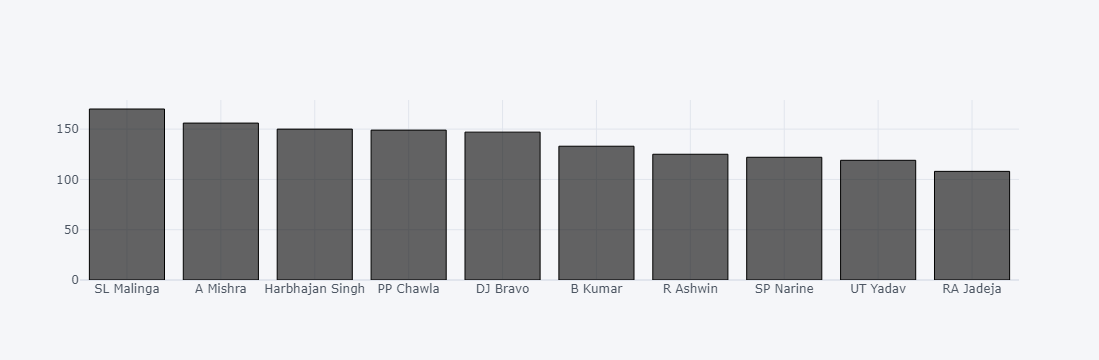

In [151]:
out['bowler'].value_counts()[:10].iplot(kind='bar', color = 'black');

## Individual Batsman Analysis

______________________________________________

### 1. Rohit Sharma's Stats

In [152]:
filt = deliveries['batsman']=='RG Sharma'
df_rohit = deliveries[filt]
df_rohit.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
275,2,1,MI,RPS,5,3,RG Sharma,JC Buttler,Imran Tahir,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
276,2,1,MI,RPS,5,4,RG Sharma,JC Buttler,Imran Tahir,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
278,2,1,MI,RPS,5,6,RG Sharma,JC Buttler,Imran Tahir,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
279,2,1,MI,RPS,6,1,RG Sharma,JC Buttler,DL Chahar,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
285,2,1,MI,RPS,7,1,RG Sharma,JC Buttler,Imran Tahir,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


##### Dismissal Kind of Rohit Sharma

In [153]:
df_rohit['dismissal_kind'].value_counts()

dismissal_kind
caught               103
bowled                22
run out               17
lbw                   11
caught and bowled      6
stumped                3
Name: count, dtype: int64

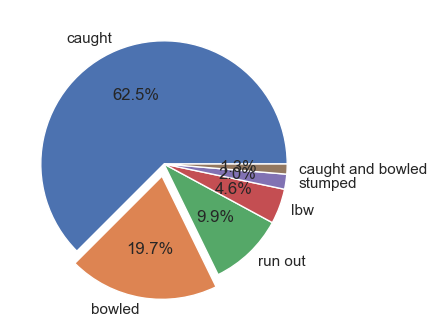

In [154]:
fig,ax = plt.subplots(figsize=(4,4), dpi = 100)
times = [95,30,15,7,3,2]
kind = ['caught','bowled','run out','lbw','stumped','caught and bowled']
explode = [0,0.1,0,0,0,0]
plt.pie(times, labels=kind, autopct='%1.1f%%',explode = explode);

##### Number of Boundaries (4s) by Rohit Sharma

In [155]:
len(df_rohit[df_rohit['batsman_runs']==4])

431

##### Number of maximums (6s) by Rohit Sharma

In [157]:
len(df_rohit[df_rohit['batsman_runs']==6])

194

##### Distribution of runs scored by Rohit Sharma

In [158]:
df_rohit.groupby('batsman')['batsman_runs'].sum()

batsman
RG Sharma    4914
Name: batsman_runs, dtype: int64

In [159]:
def run_count(df,runs):
    return len(df_rohit[df_rohit['batsman_runs']==runs]) * runs
run_count(df_rohit,1)

1589

In [160]:
run_count(df_rohit,2)

410

In [161]:
run_count(df_rohit,3)

15

In [162]:
run_count(df_rohit,4)

1724

In [163]:
run_count(df_rohit,5)

5

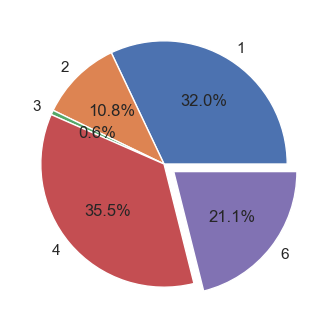

In [164]:
fig,ax = plt.subplots(figsize=(4,4), dpi = 100)
runs = [1741,586,33,1928,1146]
types = ['1','2','3','4','6']
explodes = [0,0,0,0,0.1]
plt.pie(runs, labels=types, autopct='%1.1f%%', explode=explodes);

##### Performance across different seasons

In [165]:
df_rohit1 = matches[['id','season']].merge(deliveries, left_on='id', right_on='match_id', how='left')
df_rohit1.drop('id', axis=1, inplace=True)
df_rohit1.head()

,season,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,2017,1,1,SRH,RCB,1,1,DA Warner,S Dhawan,TS Mills,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,2017,1,1,SRH,RCB,1,2,DA Warner,S Dhawan,TS Mills,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,2017,1,1,SRH,RCB,1,3,DA Warner,S Dhawan,TS Mills,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,2017,1,1,SRH,RCB,1,4,DA Warner,S Dhawan,TS Mills,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,2017,1,1,SRH,RCB,1,5,DA Warner,S Dhawan,TS Mills,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [166]:
df_rohit = df_rohit1[df_rohit1['batsman']=='RG Sharma']
df_rohit.head()

,season,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
275,2017,2,1,MI,RPS,5,3,RG Sharma,JC Buttler,Imran Tahir,...,0,0,0,0,0,0,0,NaN,NaN,NaN
276,2017,2,1,MI,RPS,5,4,RG Sharma,JC Buttler,Imran Tahir,...,0,0,0,0,1,0,1,NaN,NaN,NaN
278,2017,2,1,MI,RPS,5,6,RG Sharma,JC Buttler,Imran Tahir,...,0,0,0,0,1,0,1,NaN,NaN,NaN
279,2017,2,1,MI,RPS,6,1,RG Sharma,JC Buttler,DL Chahar,...,0,0,0,0,1,0,1,NaN,NaN,NaN
285,2017,2,1,MI,RPS,7,1,RG Sharma,JC Buttler,Imran Tahir,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [167]:
df_rohit.groupby('season')['batsman_runs'].sum()

season
2008    404
2009    362
2010    404
2011    372
2012    433
2013    538
2014    390
2015    482
2016    489
2017    333
2018    297
2019    410
Name: batsman_runs, dtype: int64

GRAPHICAL REPRESENTATION:

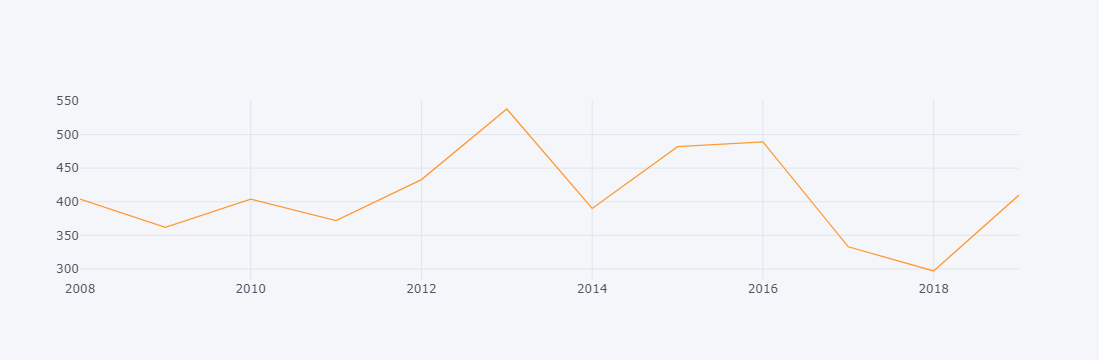

In [168]:
df_rohit.groupby('season')['batsman_runs'].sum().iplot()

## Season Wise Individual Batsman Stats

In [169]:
batsmanstats = matches[['id','season']].merge(deliveries, left_on = 'id', right_on='match_id', how='inner')
batsmanstats.drop('match_id', axis=1, inplace=True)
batsmanstats.head(1)

,id,season,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,2017,1,SRH,RCB,1,1,DA Warner,S Dhawan,TS Mills,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [171]:
batsmanscores = batsmanstats.groupby(['season','batsman'])['batsman_runs'].sum().reset_index()
batsmanscores.head(5)

,season,batsman,batsman_runs
0,2008,A Chopra,42
1,2008,A Kumble,13
2,2008,A Mishra,37
3,2008,A Mukund,0
4,2008,A Nehra,3


# FEATURE SELECTION

In [175]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif

# Load the data
matches = pd.read_csv('matches.csv')

matches = matches.drop(columns=['id', 'date', 'city', 'player_of_match', 'venue', 'umpire1', 'umpire2', 'umpire3'])

# Drop rows with missing values
matches = matches.dropna()

# Encode categorical features
label_encoders = {}
for column in matches.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    matches[column] = le.fit_transform(matches[column])
    label_encoders[column] = le

# Define the target variable and features
X = matches.drop(columns=['winner'])
y = matches['winner']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Select K Best Features
k_best = SelectKBest(score_func=f_classif, k='all')
k_best.fit(X_train, y_train)
k_best_scores = k_best.scores_

# Random Forest for Feature Importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_importances = rf.feature_importances_

# Combine scores into a DataFrame
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'SelectKBest Score': k_best_scores,
    'RandomForest Importance': rf_importances
})

# Sort features by importance
feature_scores = feature_scores.sort_values(by='RandomForest Importance', ascending=False)
feature_scores

,Feature,SelectKBest Score,RandomForest Importance
2,team2,17.116850,0.264529
1,team1,9.197903,0.213286
3,toss_winner,13.172416,0.162834
7,win_by_runs,1.024045,0.119354
8,win_by_wickets,1.453283,0.099938
0,season,8.397067,0.094475
4,toss_decision,3.101404,0.032265
6,dl_applied,1.579222,0.009205
5,result,0.605315,0.004113
